<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Copy_of_fdsn_magnetism_lab2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENVPHYS 200 - Magnetic data lab

**Objective:** In this lab you will read, plot and filter magnetic data from a station in a volcano in Alaska.

https://www.fdsn.org/about/ explains what is FDSN (International Federation of Digital Seismograph Networks). Originally designed for seismic networks, you can get seismic data from around the globe. For example, IRIS is a consortium with an FDSN server. We will first install **obspy** which allows us to retrieve data from the web and work with it.

Note: this can take a few minutes. Run the cell a second time to make sure everything installed. The second time is faster.

In [ ]:
!pip install obspy
!pip install cartopy # to add plotting of maps in some of the obspy modules

Note there is mention of obspy. This is the software that helps you download, process and display the time series from FDSN servers. Have a look here to read about obspy: https://docs.obspy.org/tutorial/index.html.

FDSN provides you with a time series. The metadata tells you what the time series means. You can convert to the actual units of what is recorded, for example, with the metadata.

A seismogram is measured in metres of ground displacement.

To give you an important example of the modules in obspy, read the UTCDateTime page of the tutorial, because we are going to use it next to look at a seismogram:

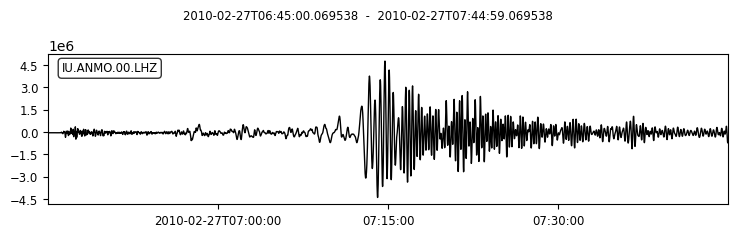

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS") # this is the (fdsn) server where we get the data

t = UTCDateTime("2010-02-27T06:45:00.000")
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="LHZ", starttime=t, endtime=t + 60 * 60) # time is in seconds.
st.plot(); ## The semi-colon is a trick to avoid a bug of getting two graphs plotting the same data

To understand what is happening here, you need to read:

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html


In particular you need to understand what the letters in **channel** mean, look at  https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/

## Question 1

What data is in a channel called "MKD"?

**Band/Sample rate: 1 - 10 Hz, Instrument Type: Temperature, Orientation: Down Hole**


FDSN servers around the world host all kinds of data. For example, there is a network of magnetometers led by Columbia University, with the data hosted on the IRIS server:
https://avert.ldeo.columbia.edu/magnetometry/ has a lot of info on magnetometry. In the following cell we download an inventory of the network that contains magnetometers.


Inventory created at 2023-10-27T04:53:25.453300Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=AV&channel=LFZ
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AV
		Stations (4):
			AV.CLNE (Cleveland Northeast, Cleveland Volcano, Alaska)
			AV.CLSF (Cleveland South Flank, Cleveland Volcano, Alaska)
			AV.OKBR (Big Rock, Okmok Caldera, Alaska)
			AV.OKWE (Weeping Wall, Okmok Caldera, Alaska)
		Channels (0):



/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


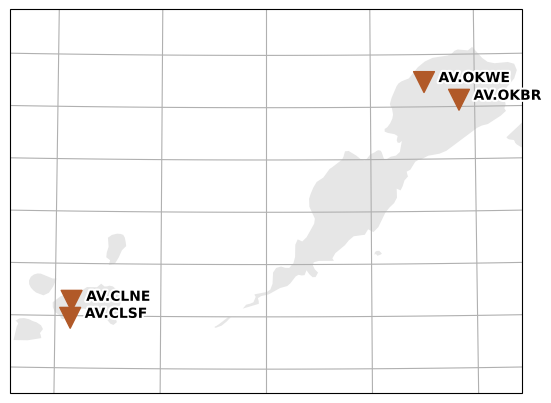

In [ ]:
inv = client.get_stations(network='AV',channel='LFZ')
print(inv)
inv.plot(projection='local');

Now that you understand reading FDSN data, Write a code below that will read/plot data from the IRIS repository from a magnetometer station. Adjust the code to download and plot a seismogram to plot 1 month of magnetometer data from station CLNE from 2022.

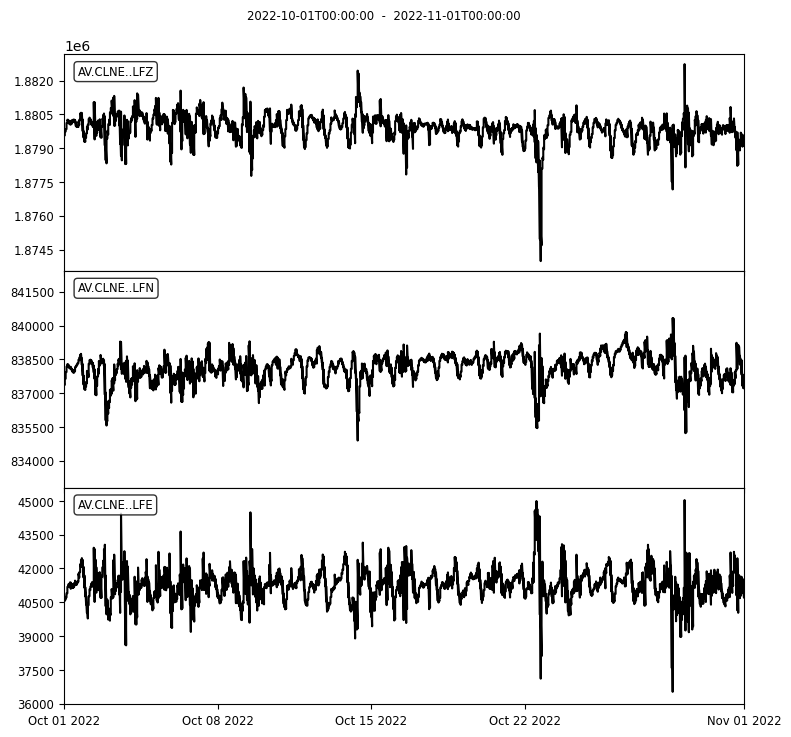

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("IRIS")


start_time = UTCDateTime("2022-10-01")
end_time = UTCDateTime("2022-11-01")

st = client.get_waveforms(network="AV", station="CLNE", location="*", channel="LF*", starttime=start_time, endtime=end_time)

st.plot();



If all is well, you have a plot of a time series associated with the magnetometer CLNE. However, the y-axis is in arbitrary units. To turn the y-axis in to the SI unit of magnetic field strength, rewrite your code that download and plots the magnetic data with two additions:

1. between the brackets in the get_waveforms() command, add another argument: attach_response=True
2. after getting your stream st that way, write a new line: st.remove_sensitivity()
3. plot as usual, but notice the different values on the y-axis. These are now in the SI unit.

## Question 2
What is the unit for magnetic field strength on the y-axis? Do the values match what you learned in class this week?

**In general, magnetic field strength is often measured in Tesla (T) or its subunit, the nanotesla (nT), in geophysical applications. The y-axis is nT.**

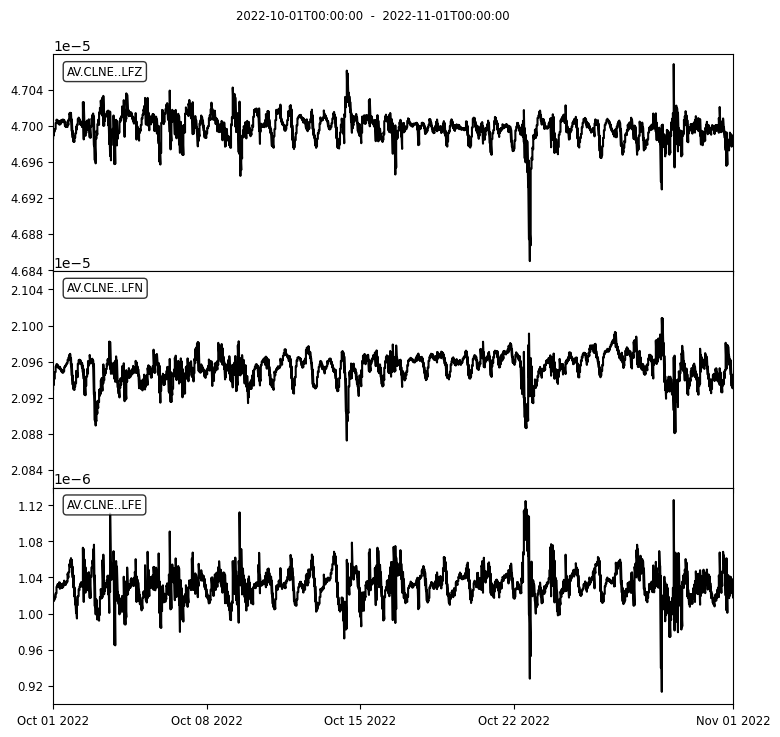

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("IRIS")


start_time = UTCDateTime("2022-10-01")
end_time = UTCDateTime("2022-11-01")

st = client.get_waveforms(network="AV", station="CLNE", location="*", channel="LF*", starttime=start_time, endtime=end_time, attach_response=True)
st.remove_sensitivity();

st.plot();


## Filtering

Apply a **lowpass** filter on the series with frequencies  $<$ 1e-5 Hz, and plot. In the code below you can see how you filter out the DC component in the data first. Read the obspy documentation

https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html

on how to filter.

The examples at the end are very useful.

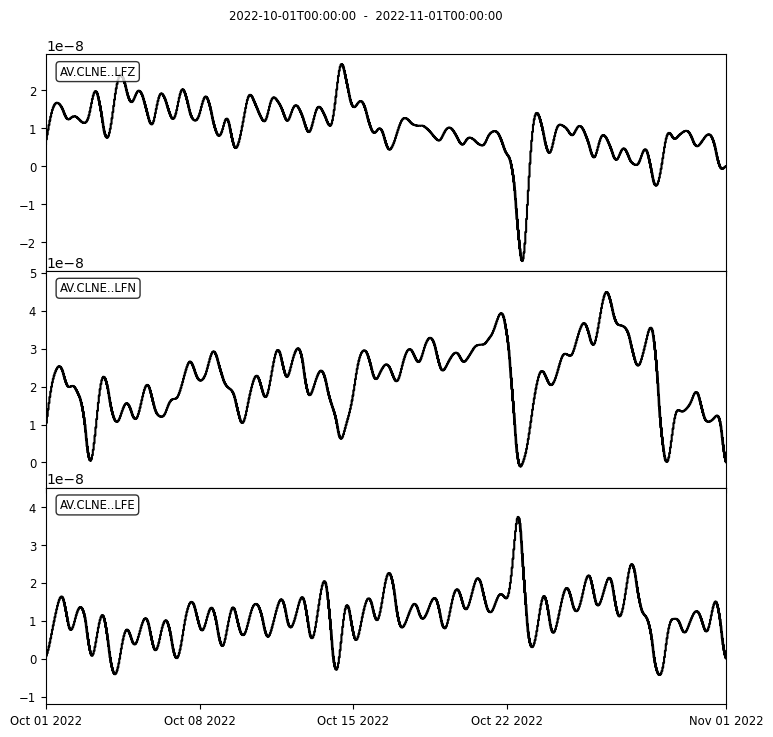

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import obspy

stfilt = st.copy()
stfilt.detrend()

stfilt.filter('lowpass', freq=0.00001, corners=2, zerophase=True)

stfilt.plot();

## QUESTION 3

What is producing trends in the magnetic data with frequencies on the order of 0.00001 Hz? Explain in the markdown cell below:


**First, slow changes in the geomagnetic field are caused by dynamic changes in the Earth's core and mantle, including long-term and dramatic changes. Secondly, solar activity is also the main driving force of the geomagnetic field. Geomagnetic storms caused by solar flares and coronal mass ejections affect the Earth's magnetic field with low frequency. Tectonic movements and volcanic activities within the earth's crust are accompanied by geomagnetic anomalies, which are related to crustal movement and magma chamber activity. Human activities, especially mining, construction, and land use, introduce anthropogenic magnetic disturbances, especially large-scale construction projects, which can lead to long-term magnetic data changes. Instrument drift and environmental disturbances (such as temperature changes and electromagnetic interference) can also affect long-term trends in magnetic data. In addition, differences in the magnetic properties of underground rocks and minerals may also cause long-term magnetic anomalies.**


## QUESTION 4

Filter and plot the Earth's magentic data below 1e-6 Hz.


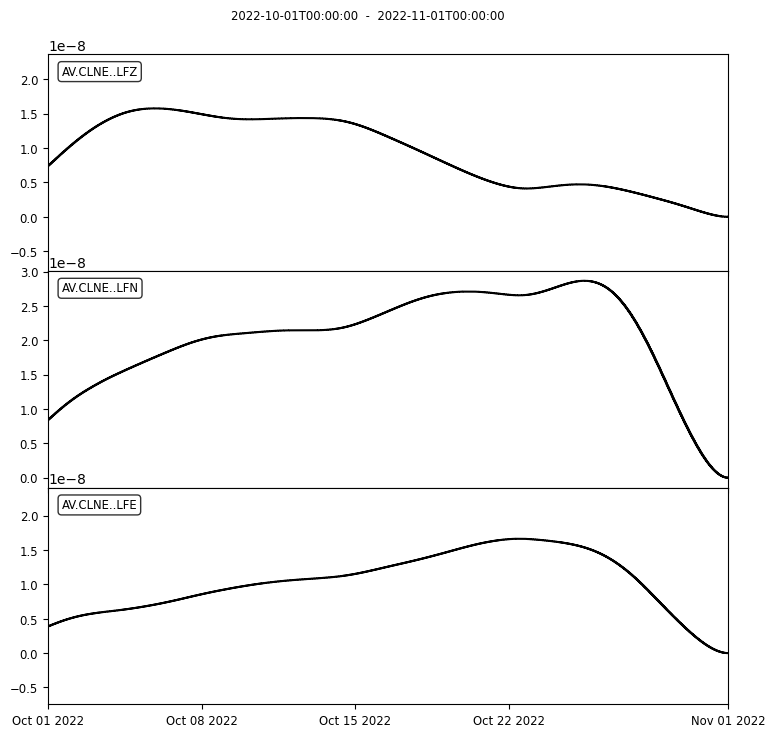

In [ ]:
stfilt2 = st.copy() # make a copy of the original data so that you can use othe filters on the same dataset, later
stfilt2.detrend() # removes the DC noise component in your data; this is needed to filter

## Write your filter below:
stfilt2.filter('lowpass', freq=0.000001, corners=2, zerophase=True)

stfilt2.plot();


What is producing this low frequency temporal change in the magnetic field?

**First, the measuring instruments themselves may have errors in precision and accuracy, and even high-precision instruments are not immune to minor deviations during manufacturing and use. In order to ensure the accuracy of the data, scientists will understand the accuracy and error range of the instrument in detail and make corresponding corrections in data analysis. Secondly, human factors may also introduce errors during the measurement process, such as reading deviations due to visual errors or careless operation. To reduce this error, scientists undergo regular training and calibration to improve the accuracy of their operations. In addition, measuring equipment may also be interfered by the surrounding environment, such as electromagnetic interference, vibration, temperature changes and other external factors, which may affect the normal operation of the instrument. In field measurements, surrounding terrain, buildings, cables and other objects may also introduce interference.**

## BONUS QUESTION

Can you plot FDSN data for a buoy that measures the depth of the water in the Waitematā harbour? What is causing the variations in these data?

(If you take ENVPHYS 300, you will use these data)

*Hint*: Much of New Zealand's environmental data is managed by GEONET. Search for the buoy on their website, find the network and the channel, then use what you learned today to download and plot the data.

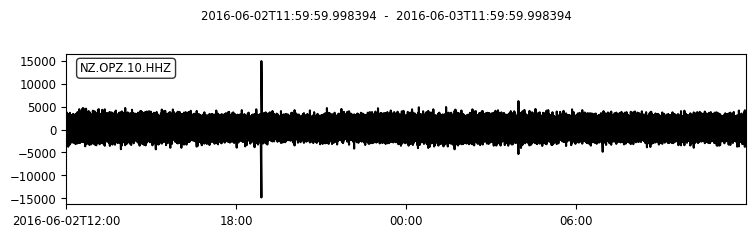

In [ ]:
# insert your code here
!pip install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("http://service.geonet.org.nz")

start_time = UTCDateTime("2016-06-02T12:00:00.000")
end_time = UTCDateTime("2016-06-03T12:00:00.000")

st = client.get_waveforms(network="NZ", station="OPZ", location="10", channel="HHZ", starttime=start_time, endtime=end_time)


st.plot()
plt.show()


link:https://colab.research.google.com/drive/1Bk04wLptMzZZJFQhFXNAkvuOkmMIt0eq?usp=sharing